#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

Updated file nbtext.py


In [3]:
css()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [37]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file graph_networkx_louvain.py


## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [50]:
nb.get_urn({'ddk':"641%", 'limit':100})

[[2014110448184, 'Illing, Beatrix', 'Oppskriftsbok for mikrobølgeovner', 1985],
 [2014103007731, '', 'Husmorens store kokebok', 1963],
 [2013041506072, 'Valente, Gino', 'Min bestemors soppkjøkken', 1994],
 [2015042348028, '', 'Lette sommerretter', 1988],
 [2015111008047, 'Östenius, Asta', 'Lite men godt', 1957],
 [2015090348079, 'Sälzer, Sabine', 'Basic - ganske enkelt god mat', 2000],
 [2008021204066, 'Pollestad, Kjell Arild', 'Maten er halve føda', 1995],
 [2015011508230, 'Færden, Kirstin', 'Bruk av fisk i storhusholdninger', 1985],
 [2016101448013, 'Klamerholm, Aslaug Fjørstad', 'Kokebok', 1957],
 [2008073104024, 'Jaine, Tom', 'Hjemmebakt brød', 1996],
 [2009021100109, 'Farrow, Joanna', 'Pepperkaker', 1998],
 [2013080606073, 'Glefjell, Sidsel', 'Mat: arbeid og kultur', 1985],
 [2015010748057, '', 'Ostegleder', 1987],
 [2016041448240, 'Schjøll, Finn', 'Vinterfryd, julefryd', 2000],
 [2015062408096, '', 'Norsk mat', 1984],
 [2013091106204,
  'Norman, Jill',
  'lille boken om søte &amp

In [51]:
korpus = nb.Corpus(ddk='641%', period = (1960, 2010))

In [52]:
korpus.difference(doc_exp=1.1, freq_exp=1.1)

In [53]:
korpus.target_urn

[2016060848070,
 2011083108060,
 2013062138088,
 2012021608024,
 2010051803010,
 2007112604056,
 2008111304093,
 2008080704046,
 2015082048019,
 2014110448058,
 2016011207537,
 2014103007519,
 2015121548066,
 2016011207574,
 2010022503033,
 2010081803023,
 2011100606070,
 2013011407041,
 2008061704003,
 2013040338016,
 2016091648024,
 2014033148156,
 2015082448339,
 2014102848188,
 2014103007515,
 2007081001015,
 2007082400022,
 2013091838002,
 2015121548091,
 2010062508064,
 2011021403011,
 2014120107547,
 2013062438150,
 2014020548023,
 2016072548075,
 2008073000068,
 2009061600021,
 2016042648059,
 2015082048046,
 2014062707173,
 2016022548026,
 2013080806086,
 2008022600026,
 2010052003015,
 2011072008040,
 2011010703026,
 2014071608189,
 2016022448075,
 2016072848041,
 2015050748030,
 2014062407033,
 2008060904016,
 2011022203010,
 2007111900023,
 2007080704029,
 2016022448005,
 2016021507600,
 2016070648039,
 2012091706036,
 2016072948193,
 2010042003066,
 2013073006001,
 2009021

In [63]:
grafer = dict()
for u in korpus.target_urn:
    try:
        grafer[u] = nb.make_network_graph(u,list(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist = False).index)[:400]) 
    except:
        True

## Analyse

Hent ut mulige navn fra boken

In [64]:
graf = nx.compose_all([grafer[u] for u in grafer])

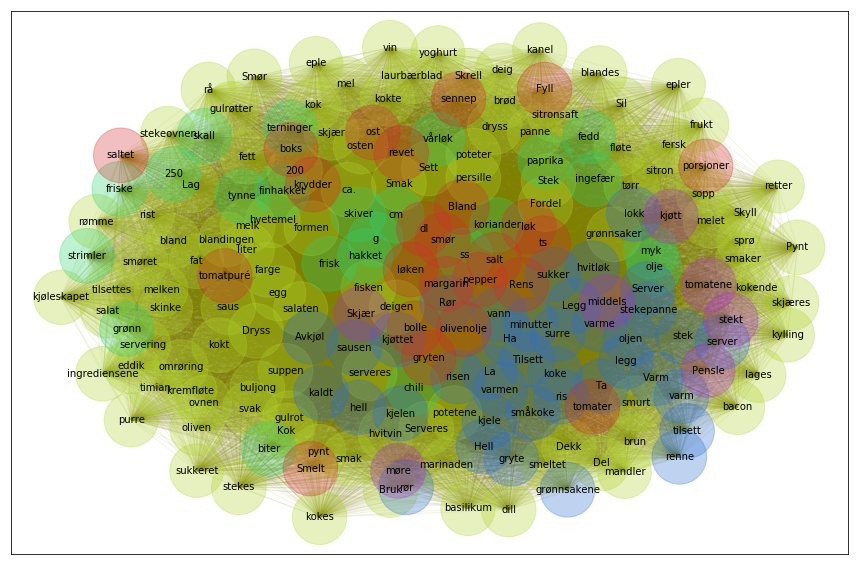

In [72]:
gnl.show_graph(graf)

Clustring slik fargene viser

In [65]:
len(grafer)

96

In [73]:
gnl.show_community(graf)

1 smøret, farge, smurt, Dryss, fett, fat, Skyll, Smør, smak, omrøring, basilikum, rå, stekeovnen, Del, brun, salat, persille, kokt, ingrediensene, tilsettes, Fordel, panne, skjær, timian, bland, dryss, fersk, Smak, pynt, sukkeret, ovnen, frukt, svak, rømme, oliven, mandler, mel, saus, sprø, Sil, bacon, kokte, poteter, kylling, gulrøtter, smeltet, blandes, potetene, buljong, deigen, eple, Skrell, kok, Dekk, sitron, Lag, suppen, brød, kjøleskapet, Kok, skinke, vin, kokende, blandingen, gulrot, deig, servering, salaten, formen, fløte, stekes, melk, Bruk, hvetemel, kanel, fisken, ca., sitronsaft, kokes, laurbærblad, skjæres, dill, purre, marinaden, Serveres, egg, yoghurt, serveres, lages, sopp, grønnsaker, eddik, tørr, melken, epler, Pynt, Stek, rist, smaker, 200, osten, Sett, kremfløte, liter, melet, retter, hvitvin

2 frisk, strimler, biter, terninger, ingefær, olje, chili, skiver, g, 250, tynne, fedd, paprika, skall, koriander, ss, hakket, myk, friske, vårløk, finhakket, cm, grønn

3 gr

Se litt på hva statistikken viser

In [71]:
dict(nb.central_betweenness_characters(graf, n=10))

{'200': 3.743096017558608e-05,
 'Del': 3.743096017558608e-05,
 'Dryss': 3.743096017558608e-05,
 'La': 3.743096017558608e-05,
 'Legg': 3.743096017558608e-05,
 'Pynt': 3.743096017558608e-05,
 'Server': 3.743096017558608e-05,
 'Sett': 3.743096017558608e-05,
 'Skjær': 3.743096017558608e-05,
 'Stek': 3.743096017558608e-05}

In [68]:
dict(nb.central_characters(graf, n=10))

{'200': 1.0,
 'Del': 1.0,
 'Dryss': 1.0,
 'La': 1.0,
 'Legg': 1.0,
 'Pynt': 1.0,
 'Server': 1.0,
 'Sett': 1.0,
 'Skjær': 1.0,
 'Stek': 1.0}

In [69]:
[edge for edge in graf.edges(data=True) if edge[2]['weight'] > 100]

[('margarin', 'smør', {'weight': 145.0}),
 ('salt', 'pepper', {'weight': 123.0})]

In [70]:
subedge = [(edge[0], edge[1]) for edge in navnegraf.edges(data=True) if edge[2]['weight'] > 5]

NameError: name 'navnegraf' is not defined

In [ ]:
gnl.show_graph(graf.edge_subgraph(subedge))

In [ ]:
nb.central_betweenness_characters(graf.edge_subgraph(subedge))

In [ ]:
nb.central_characters(graf.edge_subgraph(subedge))